## Aufgabe zum Gradientenverfahren

#### Imports & Settings

In [301]:
# in this code block we gather all imports

# we import pandas only since it is needed by ppscore

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ppscore as pps
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

from numpy.typing import ArrayLike


#### Load Data

In [302]:
# in this code block we load the data

# this is the number of data points aka. instances in the given dataset
number_of_known_data_points = 14

x_known_unsorted = np.asarray([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290]).astype('float32')
assert x_known_unsorted.shape == (number_of_known_data_points,)
assert x_known_unsorted.dtype == 'float32'

y_known_unsorted = np.asarray([44,97,30,51,95,51,44,41,21,40,90,83,61,92]).astype('float32')
assert y_known_unsorted.shape == (number_of_known_data_points,)
assert y_known_unsorted.dtype == 'float32'

dataset_known_unsorted = np.asarray([ x_known_unsorted, y_known_unsorted ]).transpose()
# the following call would sort all columns individually which we do not want
#dataset_known.sort(axis=0)
# instead here we want to sort the rows by the values in the first column
print(f"dataset_known_unsorted=\n{dataset_known_unsorted}")
dataset_known_intermediate_view = dataset_known_unsorted[:, 0]
dataset_known_intermediate_indices_for_sorting = dataset_known_intermediate_view.argsort()
print(dataset_known_intermediate_indices_for_sorting)
dataset_known = dataset_known_unsorted[dataset_known_intermediate_indices_for_sorting]
assert dataset_known.shape == (number_of_known_data_points,2)
assert dataset_known.dtype == 'float32'
print(dataset_known.shape)
print(f"dataset_known=\n{dataset_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
x_known = dataset_known[:,0]
assert x_known.shape == (number_of_known_data_points,)
assert x_known.dtype == 'float32'
print(f"x_known=\n{x_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
y_known = dataset_known[:,1]
assert y_known.shape == (number_of_known_data_points,)
assert y_known.dtype == 'float32'
print(f"y_known=\n{y_known}")

dataset_known_unsorted=
[[  84.   44.]
 [1323.   97.]
 [ 282.   30.]
 [ 957.   51.]
 [1386.   95.]
 [ 810.   51.]
 [ 396.   44.]
 [ 474.   41.]
 [ 501.   21.]
 [ 660.   40.]
 [1260.   90.]
 [1005.   83.]
 [1110.   61.]
 [1290.   92.]]
[ 0  2  6  7  8  9  5  3 11 12 10 13  1  4]
(14, 2)
dataset_known=
[[  84.   44.]
 [ 282.   30.]
 [ 396.   44.]
 [ 474.   41.]
 [ 501.   21.]
 [ 660.   40.]
 [ 810.   51.]
 [ 957.   51.]
 [1005.   83.]
 [1110.   61.]
 [1260.   90.]
 [1290.   92.]
 [1323.   97.]
 [1386.   95.]]
x_known=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_known=
[44. 30. 44. 41. 21. 40. 51. 51. 83. 61. 90. 92. 97. 95.]


### Exploratory Data Analysis

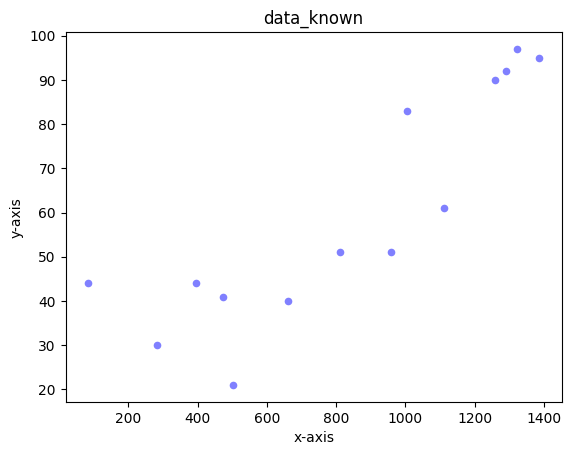

mean=[824.1429  60.    ]
trimmed_mean=[839.        60.166668]
mode=ModeResult(mode=array([[84., 44.]], dtype=float32), count=array([[1, 2]]))
range=[1302.   76.]
iqr=[741.75  46.5 ]
percentile_10=[316.2  33. ]
percentile_25=[480.75  41.75]
median=[883.5  51. ]
percentile_75=[1222.5    88.25]
percentile_90=[1313.1   94.1]
mad=[366.        22.571428]
std=[412.55402  25.21904]
var=[170200.83    636.  ]

correlation_matrix=
[[1.   0.87]
 [0.87 1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,y,0.406879,regression,True,mean absolute error,21.285715,12.625000,DecisionTreeRegressor()
2,y,x,0.533897,regression,True,mean absolute error,366.000000,170.593750,DecisionTreeRegressor()
3,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [303]:
# in this code block we do an EDA

# plain line plot
plt.figure(dpi=100)
plt.plot(x_known,y_known,linestyle='',marker='.',markersize=11.,markerfacecolor='#8080ff',markeredgewidth=.0)
plt.title('data_known')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# location parameters
print(f"mean={dataset_known.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known)}")
print(f"iqr={stats.iqr(dataset_known, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known)}")

print(f"std={dataset_known.std(axis=0)}")
print(f"var={dataset_known.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known, rowvar=False).round(decimals=2)}")

dataset_known_pd = pd.DataFrame(dataset_known, columns = ['x','y'])
predictive_power_score_matrix_all_pd = pps.matrix(dataset_known_pd, output='df')
predictive_power_score_matrix_all_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)




### Normalize Data

In [304]:
# in this code block we normalize the data

scaler = MinMaxScaler()
scaler.fit(dataset_known)

# note that we do not need to sort again after scaler.transform(...)
# nor do we need to switch back to data type float32
# since the function preserves order and data type

dataset_known_norm = scaler.transform(dataset_known)
assert dataset_known_norm.shape == (number_of_known_data_points,2)
assert dataset_known.dtype == 'float32'
print(dataset_known_norm.shape)
print(f"dataset_known_norm=\n{dataset_known}")

x_known_norm = dataset_known_norm[:,0]
assert x_known_norm.shape == (number_of_known_data_points,)
assert x_known_norm.dtype == 'float32'
print(f"x_known_norm=\n{x_known_norm}")

y_known_norm = dataset_known_norm[:,1]
assert y_known_norm.shape == (number_of_known_data_points,)
assert y_known_norm.dtype == 'float32'
print(f"y_known_norm=\n{y_known_norm}")


(14, 2)
dataset_known_norm=
[[  84.   44.]
 [ 282.   30.]
 [ 396.   44.]
 [ 474.   41.]
 [ 501.   21.]
 [ 660.   40.]
 [ 810.   51.]
 [ 957.   51.]
 [1005.   83.]
 [1110.   61.]
 [1260.   90.]
 [1290.   92.]
 [1323.   97.]
 [1386.   95.]]
x_known_norm=
[0.         0.15207374 0.23963133 0.29953918 0.3202765  0.44239634
 0.5576037  0.6705069  0.70737326 0.7880184  0.9032258  0.92626727
 0.9516129  1.        ]
y_known_norm=
[0.3026316  0.11842108 0.3026316  0.26315793 0.         0.25000003
 0.39473686 0.39473686 0.81578946 0.5263158  0.90789473 0.93421054
 1.         0.9736842 ]


### Exploratory Data Analysis on normalized data

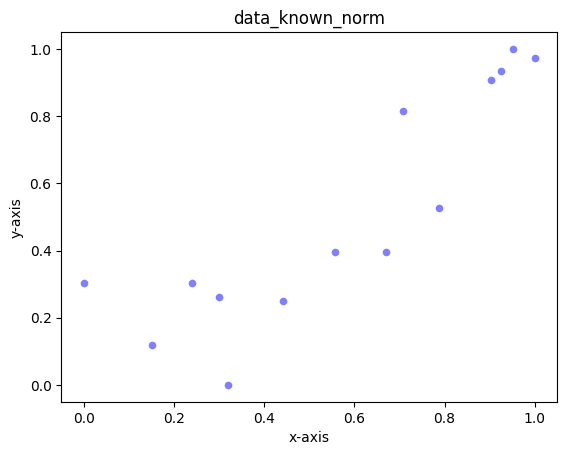

mean=[0.56846607 0.5131579 ]
trimmed_mean=[0.57987714 0.5153509 ]
mode=ModeResult(mode=array([[0.       , 0.3026316]], dtype=float32), count=array([[1, 2]]))
range=[1. 1.]
iqr=[0.56970043 0.61184207]
percentile_10=[0.17834102 0.15789476]
percentile_25=[0.30472351 0.27302635]
median=[0.61405531 0.39473686]
percentile_75=[0.87442394 0.88486841]
percentile_90=[0.9440092 0.9618421]
mad=[0.28110597 0.29699248]
std=[0.31686178 0.33182946]
var=[0.10040139 0.1101108 ]

correlation_matrix=
[[1.   0.87]
 [0.87 1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,y,0.406879,regression,True,mean absolute error,0.280075,0.166118,DecisionTreeRegressor()
2,y,x,0.533897,regression,True,mean absolute error,0.281106,0.131024,DecisionTreeRegressor()
3,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [305]:
# in this code block we run the EDA again this time on the normalized data

# plain line plot
plt.figure(dpi=100)
plt.plot(x_known_norm,y_known_norm,linestyle='',marker='.',markersize=11.,markerfacecolor='#8080ff',markeredgewidth=.0)
plt.title('data_known_norm')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# location parameters
print(f"mean={dataset_known_norm.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known_norm.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known_norm, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known_norm)}")
print(f"iqr={stats.iqr(dataset_known_norm, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known_norm, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known_norm, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known_norm, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known_norm, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known_norm, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known_norm)}")

print(f"std={dataset_known_norm.std(axis=0)}")
print(f"var={dataset_known_norm.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known_norm, rowvar=False).round(decimals=2)}")

dataset_known_norm_pd = pd.DataFrame(dataset_known_norm, columns = ['x','y'])
predictive_power_score_matrix_all_pd = pps.matrix(dataset_known_norm_pd, output='df')
predictive_power_score_matrix_all_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)


### Model Function

In [306]:
# in this code block we define our model function

# design aspects
# only one feature
# purely linear without any non-linear terms
# degree of the polynomial is 1
# thus also only one weight per feature
# b as an additive weight representing bias

# first in pure python for single x values
# note that the expressions behind the colons and behind the -> are just type hints
# in this case all hinting at float
# they might be disregarded as python in general does not check the types of values on function call
def f_pure_python(w : float, x: float, b: float) -> float:
    y = w * x + b
    return y

# now with numpy for any numpy array of any number of x values

# w stands for the weight or weights
# x stands for one or more x values
# b stands for the bias

def f(w: np.ndarray, x: np.ndarray, b: np.ndarray) -> np.ndarray:
    # note that these fancy pre-condition checks are out-commented
    # so as to also support cases in which w or b or x is provided as a plain vanilla python float
    # pre-condition checks
    #assert w.shape == (), "w must be a numpy scalar"
    #assert np.isscalar(w), "w must be a numpy scalar"
    #assert w.dtype == 'float32', "w must be of dtype float32"
    #assert b.shape == (), "b must be a numpy scalar"
    #assert np.isscalar(b), "b must be a numpy scalar"
    #assert b.dtype == 'float32', "b must be of dtype float32"
    #assert x.dtype == 'float32', "xs must be of dtype float32"
    y = w * x + b
    # note that these fancy post-condition checks are out-commented
    # so as to also support cases in which w or b or x are provided as a plain vanilla floats
    # interestingly this basically makes the function definition the same as in the pure form above
    # post-condition checks
    #assert y.dtype == 'float32', "y must be of dtype float32"
    #assert y.shape == x.shape, "y must be of same shape as xs"
    return y

# again this time as a numpy ufunc for better efficiency in numpy contexts

# in this case we chose to include _np_ufunc in the variable name referencing the function
# just to distinguish it from the above variants of the same function

f_np_ufunc = np.frompyfunc(f, 3, 1)

assert type(f_pure_python) != np.ufunc
assert type(f) != np.ufunc
assert type(f_np_ufunc) == np.ufunc

# note that functions wrapped via frompyfunc always return numpy arrays with dtype object

# also note that the speed advantage provided by making a ufunc via frompyfunc
# will be irrelevant if numba is used
# see https://numba.readthedocs.io/en/stable/user/5minguide.html



x_known=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_known=
[44. 30. 44. 41. 21. 40. 51. 51. 83. 61. 90. 92. 97. 95.]
y_line_example_2=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_line_example=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_line_example_from_np_ufunc=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_line_example_from_np_ufunc.shape=
(14,)
y_line_example_from_np_ufunc.dtype=
float32


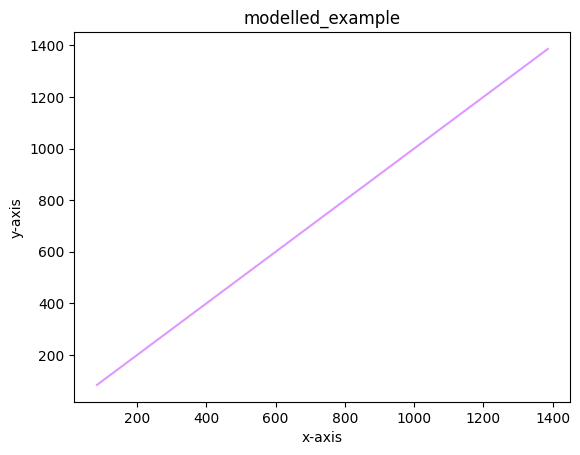

In [307]:
# in this code block we just try out the model function

print(f"x_known=\n{x_known}")
print(f"y_known=\n{y_known}")

# our more carefully chosen examples for w and b as plain python floats
w1_scalar = 1.
assert np.isscalar(w1_scalar)
b_scalar = .0
assert np.isscalar(b_scalar)

# try out the numpy version with our known x values
y_line_example_2 = f(w1_scalar, x_known, b_scalar)
assert y_line_example_2.shape == y_known.shape
assert y_line_example_2.dtype == 'float32'
assert not np.isscalar(y_line_example_2)
print(f"y_line_example_2=\n{np.round(y_line_example_2, 3)}")

# our more carefully chosen examples for w and b as numpy arrays
w1_np = np.asarray([w1_scalar], dtype='float32')
assert w1_np.shape == (1,)
assert not np.isscalar(w1_np)
b_np = np.asarray([b_scalar], dtype='float32')
assert b_np.shape == (1,)
assert not np.isscalar(b_np)

# check if it also works if we provide the one weight and the bias as numpy arrays
y_line_example = f(w1_np, x_known, b_np)
assert y_line_example.shape == y_known.shape
assert y_line_example.dtype == 'float32'
assert not np.isscalar(y_line_example)
print(f"y_line_example=\n{np.round(y_line_example, 3)}")

# check if it also works if we provide the one weight and the bias as numpy arrays
y_line_example_from_np_ufunc = f_np_ufunc(w1_np, x_known, b_np).astype('float32')
assert y_line_example_from_np_ufunc.shape == y_known.shape
print(f"y_line_example_from_np_ufunc=\n{y_line_example_from_np_ufunc}")
print(f"y_line_example_from_np_ufunc.shape=\n{y_line_example_from_np_ufunc.shape}")
print(f"y_line_example_from_np_ufunc.dtype=\n{y_line_example_from_np_ufunc.dtype}")

# the values in the last two result arrays should equal
assert (y_line_example == y_line_example_2).all()
assert (y_line_example == y_line_example_from_np_ufunc).all()

# just a plain line plot of the model function regarding a try out with normalized data
plt.figure(dpi=100)
plt.plot(x_known,y_line_example,color='#dd99ff')
plt.title('modelled_example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()


x_known_norm=
[0.         0.15207374 0.23963133 0.29953918 0.3202765  0.44239634
 0.5576037  0.6705069  0.70737326 0.7880184  0.9032258  0.92626727
 0.9516129  1.        ]
y_known_norm=
[0.3026316  0.11842108 0.3026316  0.26315793 0.         0.25000003
 0.39473686 0.39473686 0.81578946 0.5263158  0.90789473 0.93421054
 1.         0.9736842 ]
y_line_norm_example_2=
[0.    0.152 0.24  0.3   0.32  0.442 0.558 0.671 0.707 0.788 0.903 0.926
 0.952 1.   ]
y_line_norm_example=
[0.    0.152 0.24  0.3   0.32  0.442 0.558 0.671 0.707 0.788 0.903 0.926
 0.952 1.   ]


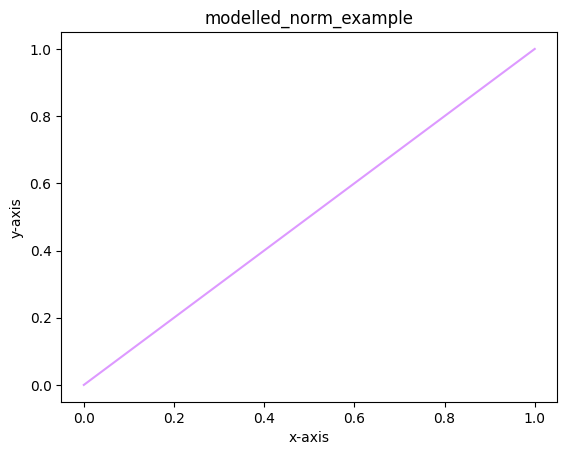

In [308]:
# in this code block we just try out the model function again this time with the normalized data

print(f"x_known_norm=\n{x_known_norm}")
print(f"y_known_norm=\n{y_known_norm}")

# our more carefully chosen examples for w and b as plain python floats
w1_norm_scalar = 1.
assert np.isscalar(w1_norm_scalar)
b_norm_scalar = .0
assert np.isscalar(b_norm_scalar)

# try out the numpy version with our known x values
y_line_norm_example_2 = f(w1_norm_scalar, x_known_norm, b_norm_scalar)
assert y_line_norm_example_2.shape == y_known_norm.shape
assert y_line_norm_example_2.dtype == 'float32'
assert not np.isscalar(y_line_norm_example_2)
print(f"y_line_norm_example_2=\n{np.round(y_line_norm_example_2, 3)}")

# our more carefully chosen examples for w and b as numpy arrays
w1_norm_np = np.asarray([w1_norm_scalar], dtype='float32')
assert w1_norm_np.shape == (1,)
assert not np.isscalar(w1_norm_np)
b_norm_np = np.asarray([b_norm_scalar], dtype='float32')
assert b_norm_np.shape == (1,)
assert not np.isscalar(b_norm_np)

# check if it also works if we provide the one weight and the bias as numpy arrays
y_line_norm_example = f(w1_norm_np, x_known_norm, b_norm_np)
assert y_line_norm_example.shape == y_known_norm.shape
assert y_line_norm_example.dtype == 'float32'
assert not np.isscalar(y_line_norm_example)
print(f"y_line_norm_example=\n{np.round(y_line_norm_example, 3)}")

# the values in the last two result arrays should equal
assert (y_line_norm_example == y_line_norm_example_2).all()

# just a plain line plot of the model function regarding a try out with normalized data
plt.figure(dpi=100)
plt.plot(x_known_norm,y_line_norm_example,color='#dd99ff')
plt.title('modelled_norm_example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

#### Error Functions

In [309]:
# in this code block we define the error functions

# for each error function we actually write down an efficient usual version and an explicit version
# the main difference is that
# the efficient versions expect the computed y-predictions as parameters
# the explicit versions expect the model function its parameters and call it

# also the efficient versions happen to be one-liners
# which does not say anything about performance

# y are the actual known values
# x are the corresponding x values
# f is the model function
# w is the weight used in the model function
# b is the bias used in the model function
# y_pred are the predictions computed using the model function

# sse formula is sum((y-f(x))^2)

def sse(y, y_pred):
    return np.square(y - y_pred).sum()

def sse_explicit(y, x, f, w, b):
    # what does the model say?
    y_pred = f(w, x, b)
    # what is the difference to the actual result
    y_diff = y - y_pred
    # squared
    squares = np.square(y_diff)
    # summed up
    sum_of_squares = squares.sum()
    return sum_of_squares

# mse formula is sum((y-f(x))^2) / n

def mse(y, y_pred):
    return sse(y, y_pred) / len(y)

def mse_explicit(y, x, f, w, b):
    sum_of_squares = sse_explicit(y, x, f, w, b)
    # divided by the number of data points
    n = len(x)
    mse_value = sum_of_squares / n
    return mse_value

# rmse formula is sqrt(sum((y-f(x))^2) / n)

def rmse(y, y_pred):
    return np.sqrt(mse(y, y_pred))

def rmse_explicit(y, x, f, w, b):
    mse_value = mse_explicit(y, x, f, w, b)
    # square root thereof
    rmse_value = np.sqrt(mse_value)
    return rmse_value

# mae formula is sum(|y-f(x)|) / n

def mae(y, y_pred):
    return np.abs(y - y_pred).sum() / len(y)

def mae_explicit(y, x, f, w, b):
    # what does the model say?
    y_m = f(w, x, b)
    # what is the difference to the actual result
    y_diff = y - y_m
    # the absolute of that
    y_diff_abs = np.abs(y_diff)
    # summed up
    y_diff_abs_sum = y_diff_abs.sum()    
    # divided by the number of data points
    n = len(x)
    mae_value = y_diff_abs_sum / n
    return mae_value



In [310]:
# in this code block we try out the efficiently implemented error functions

def error_functions_try_out(y, f, x, w1_scalar, w1_np, b_scalar, b_np):
    # check if it works if we provide w and b as pure python floats

    y_pred_using_scalars = f(w1_scalar, x, b_scalar)
    sse_example_using_scalars = sse(y, y_pred_using_scalars)
    assert np.isscalar(sse_example_using_scalars)
    print(f"sse_example_using_scalars={sse_example_using_scalars}")

    mse_example_using_scalars = mse(y, y_pred_using_scalars)
    assert np.isscalar(mse_example_using_scalars)
    print(f"mse_example_using_scalars={mse_example_using_scalars}")

    rmse_example_using_scalars = rmse(y, y_pred_using_scalars)
    assert np.isscalar(rmse_example_using_scalars)
    print(f"rmse_example_using_scalars={rmse_example_using_scalars}")

    mae_example_using_scalars = mae(y, y_pred_using_scalars)
    assert np.isscalar(mae_example_using_scalars)
    print(f"mae_example_using_scalars={mae_example_using_scalars}")

    # check if it also works if we provide w and b as numpy objects
    y_pred_np = f(w1_np, x, b_np)
    sse_example = sse(y, y_pred_np)
    assert np.isscalar(sse_example)
    print(f"sse_example={sse_example}")

    mse_example = mse(y, y_pred_np)
    assert np.isscalar(mse_example)
    print(f"mse_example={mse_example}")

    rmse_example = rmse(y, y_pred_np)
    assert np.isscalar(rmse_example)
    print(f"rmse_example={rmse_example}")

    mae_example = mae(y, y_pred_np)
    assert np.isscalar(mae_example)
    print(f"mae_example={mae_example}")

    assert sse_example_using_scalars == sse_example
    assert mse_example_using_scalars == mse_example
    assert rmse_example_using_scalars == rmse_example
    assert mae_example_using_scalars == mae_example

    return (sse_example, mse_example, rmse_example, mae_example)

# try with the original data
sse_example, mse_example, rmse_example, mae_example = error_functions_try_out(y_known, f, x_known, w1_scalar, w1_np, b_scalar, b_np)

# try with the normalized data
sse_example_norm, mse_example_norm, rmse_example_norm, mae_example_norm = error_functions_try_out(y_known_norm, f, x_known_norm, w1_norm_scalar, w1_norm_np, b_norm_scalar, b_norm_np)


sse_example_using_scalars=10312560.0
mse_example_using_scalars=736611.4285714285
rmse_example_using_scalars=858.260699654498
mae_example_using_scalars=764.1428571428571
sse_example=10312560.0
mse_example=736611.4285714285
rmse_example=858.260699654498
mae_example=764.1428571428571
sse_example_using_scalars=0.4235400855541229
mse_example_using_scalars=0.030252863253865923
rmse_example_using_scalars=0.17393350239061456
mae_example_using_scalars=0.13174352475575038
sse_example=0.4235400855541229
mse_example=0.030252863253865923
rmse_example=0.17393350239061456
mae_example=0.13174352475575038


In [311]:
# in this code block we try out the explicitly implemented error functions

def explicit_error_functions_try_out(y, f, x, w1_scalar, w1_np, b_scalar, b_np):
    # check if it works if we provide w and b as pure python floats
    sse_explicit_example_using_scalars = sse_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(sse_explicit_example_using_scalars)
    print(f"sse_explicit_example_using_scalars={sse_explicit_example_using_scalars}")

    mse_explicit_example_using_scalars = mse_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(mse_explicit_example_using_scalars)
    print(f"mse_explicit_example_using_scalars={mse_explicit_example_using_scalars}")

    rmse_explicit_example_using_scalars = rmse_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(rmse_explicit_example_using_scalars)
    print(f"rmse_explicit_example_using_scalars={rmse_explicit_example_using_scalars}")

    mae_explicit_example_using_scalars = mae_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(mae_explicit_example_using_scalars)
    print(f"mae_explicit_example_using_scalars={mae_explicit_example_using_scalars}")

    # check if it also works if we provide w and b as numpy objects
    sse_explicit_example = sse_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(sse_explicit_example)
    print(f"sse_explicit_example={sse_explicit_example}")

    mse_explicit_example = mse_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(mse_explicit_example)
    print(f"mse_explicit_example={mse_explicit_example}")

    rmse_explicit_example = rmse_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(rmse_explicit_example)
    print(f"rmse_explicit_example={rmse_explicit_example}")

    mae_explicit_example = mae_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(mae_explicit_example)
    print(f"mae_explicit_example={mae_explicit_example}")

    assert sse_explicit_example_using_scalars == sse_explicit_example
    assert mse_explicit_example_using_scalars == mse_explicit_example
    assert rmse_explicit_example_using_scalars == rmse_explicit_example
    assert mae_explicit_example_using_scalars == mae_explicit_example

    return (sse_explicit_example, mse_explicit_example, rmse_explicit_example, mae_explicit_example)

# try with the original data
sse_explicit_example, mse_explicit_example, rmse_explicit_example, mae_explicit_example = explicit_error_functions_try_out(y_known, f, x_known, w1_scalar, w1_np, b_scalar, b_np)

# try with the normalized data
sse_explicit_example_norm, mse_explicit_example_norm, rmse_explicit_example_norm, mae_explicit_example_norm = explicit_error_functions_try_out(y_known_norm, f, x_known_norm, w1_norm_scalar, w1_norm_np, b_norm_scalar, b_norm_np)


sse_explicit_example_using_scalars=10312560.0
mse_explicit_example_using_scalars=736611.4285714285
rmse_explicit_example_using_scalars=858.260699654498
mae_explicit_example_using_scalars=764.1428571428571
sse_explicit_example=10312560.0
mse_explicit_example=736611.4285714285
rmse_explicit_example=858.260699654498
mae_explicit_example=764.1428571428571
sse_explicit_example_using_scalars=0.4235400855541229
mse_explicit_example_using_scalars=0.030252863253865923
rmse_explicit_example_using_scalars=0.17393350239061456
mae_explicit_example_using_scalars=0.13174352475575038
sse_explicit_example=0.4235400855541229
mse_explicit_example=0.030252863253865923
rmse_explicit_example=0.17393350239061456
mae_explicit_example=0.13174352475575038


In [312]:
# in this code we check example results of our error functions

# error values computed by explicitly implemented error functions should equal the usual ones
assert sse_explicit_example == sse_example
assert mse_explicit_example == mse_example
assert rmse_explicit_example == rmse_example
assert mae_explicit_example == mae_example

# also for the normalized data
assert sse_explicit_example_norm == sse_example_norm
assert mse_explicit_example_norm == mse_example_norm
assert rmse_explicit_example_norm == rmse_example_norm
assert mae_explicit_example_norm == mae_example_norm

# however error values for normalized data should differ from error values for original data
assert sse_explicit_example != sse_example_norm
assert mse_explicit_example != mse_example_norm
assert rmse_explicit_example != rmse_example_norm
assert mae_explicit_example != mae_example_norm

In [317]:
# in this code block we attempt to plot the error functions with respect to normalized data

# first let us create a sorted numpy array of arbitrary values for w1 i.e. the first weight
w1s_for_plot_norm_np = np.arange(.0, 1.001, .01).astype('float32')

# we chose a value for b which we keep constant over all w1s
b_for_plot_norm_scalar = b_norm_scalar

# note that in functional programming we would use currying instead
def f_with_fixed_xs_and_b(some_w1: float):
   return f(some_w1, x_known_norm, b_for_plot_norm_scalar).astype('float32')

# we still need to vectorize the function to be able to appky it to each element of a numpy array
f_with_fixed_xs_and_b_vectorized = np.vectorize(f_with_fixed_xs_and_b)

# we compute the predictions for each w1
y_pred_norm_for_plot_np = f_with_fixed_xs_and_b_vectorized(w1s_for_plot_norm_np)

sse_axis_values_init = np.ones_like(w1s_for_plot_norm_np).astype('float32')
#sse_axis_values_result = w1s_for_plot_norm_np.map()

print(w1s_for_plot_norm_np)
print(y_pred_norm_for_plot_np)

# just a plain line plot of the error function regarding a try out
plt.figure(dpi=100)
plt.plot(w1s_for_plot_norm_np, sse_axis_values_init,color='#ffb380')
plt.title('modelled_example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

0.0
0.0
0.009999999776482582
0.019999999552965164
0.029999999329447746
0.03999999910593033
0.05000000074505806
0.05999999865889549
0.07000000029802322
0.07999999821186066
0.09000000357627869
0.10000000149011612
0.10999999940395355
0.11999999731779099
0.12999999523162842
0.14000000059604645
0.15000000596046448
0.1599999964237213
0.17000000178813934
0.18000000715255737
0.1899999976158142
0.20000000298023224
0.20999999344348907
0.2199999988079071
0.23000000417232513
0.23999999463558197
0.25
0.25999999046325684
0.27000001072883606
0.2800000011920929
0.28999999165534973
0.30000001192092896
0.3100000023841858
0.3199999928474426
0.33000001311302185
0.3400000035762787
0.3499999940395355
0.36000001430511475
0.3700000047683716
0.3799999952316284
0.38999998569488525
0.4000000059604645
0.4099999964237213
0.41999998688697815
0.4300000071525574
0.4399999976158142
0.44999998807907104
0.46000000834465027
0.4699999988079071
0.47999998927116394
0.49000000953674316
0.5
0.5099999904632568
0.51999998092651

ValueError: setting an array element with a sequence.

#### Gradient Functions

In [ ]:
# WIP
# in this code block we define the gradient functions with respect to the error functions

# gradient of sse
def sse_gradient_if_f_is_a_line_pure_python(y: float,w: float,x: float,b: float):
    result = -2 * x * ( -b - w * x + y)
    return result

def sse_gradient_if_f_is_a_line(y,w,x,b):
    result = -2 * x * (-b-w*x+y)
    return result

def mse_gradient():
    return ()

def rmse_gradient():
    return ()



#### Initialize Weights randomly

In [ ]:
# in this code block our weight values are initialized in a very explicit verbose fashion

# this is the number of weights in our model function
# so it is also going to be the number of values in our vector of weights w
number_of_weights = 2

# in the following the variables prefixed with w_pre_ are just intermediate variables
# the variable w_init is the vector of our weights after initialization

# in this example we draw random values based on a normal distribution
# we actually draw two more values than number_of_weights
# since during the following min-max-normalization
# the smallest value, the min, always becomes .0 (or at least very close to it owed to floats)
# and the largest value, the max, always becomes 1. (or at least very close to it owed to floats)
w_pre_number_of_values = number_of_weights + 2
w_pre_random_values_float64 = np.random.normal(loc=.5, scale=.2, size=w_pre_number_of_values)
# note that the random function yields float64 however we want float32 all the way
w_pre_random_values = w_pre_random_values_float64.astype('float32')
assert w_pre_random_values.shape == (w_pre_number_of_values,)
assert w_pre_random_values.dtype == 'float32'
print(f"w_pre={w_pre_random_values}")

# the values in w_pre_initialized can be below 0 and above 1 so we min-max-normalize them
# in this case just out of curiosity through explicit code based on numpy primitives
# instead of using functionality from some library such as the MinMaxScaler from scikit-learn
# formula for min-max-normalization is value_min_max_norm = value - min / max - min

# the min of the drawn random values and note that scalars have shape ()
w_pre_min = w_pre_random_values.min()
assert w_pre_min.shape == ()
assert w_pre_min.dtype == 'float32'
print(f"w_pre_min={w_pre_min}")

# the max of the drawn random values
w_pre_max = w_pre_random_values.max()
assert w_pre_max.shape == ()
assert w_pre_max.dtype == 'float32'
print(f"w_pre_max={w_pre_max}")

# the range
w_pre_range = w_pre_max - w_pre_min
assert w_pre_range.shape == ()
assert w_pre_range.dtype == 'float32'
print(f"w_pre_range={w_pre_range}")

# 1 over the range and note how the division yields float64 however we want float32 all the way
w_pre_range_reciprocal = (1 / w_pre_range).astype('float32')
assert w_pre_range_reciprocal.shape == ()
assert w_pre_range_reciprocal.dtype == 'float32'
print(f"w_pre_range_reciprocal={w_pre_range_reciprocal}")

# an array of the same shape as w_pre_random_values and where all values equal w_pre_min
w_pre_min_repeated = np.full_like(w_pre_random_values, w_pre_min)
assert w_pre_min_repeated.shape == (w_pre_number_of_values,)
assert w_pre_min_repeated.dtype == 'float32'
print(f"w_pre_min_repeated={w_pre_min_repeated}")

# an array with all the random values after subtracting w_pre_min from them
w_pre_minus_min = np.subtract(w_pre_random_values, w_pre_min_repeated)
assert w_pre_minus_min.shape == (w_pre_number_of_values,)
assert w_pre_minus_min.dtype == 'float32'
print(f"w_pre_minus_min={w_pre_minus_min}")

# the array with the min-max-normalized random values
w_pre_min_max_norm = w_pre_minus_min * w_pre_range_reciprocal
assert w_pre_min_max_norm.shape == (w_pre_number_of_values,)
assert w_pre_min_max_norm.dtype == 'float32'
print(f"w_pre_min_max_norm={w_pre_min_max_norm}")

# we now mask the values that are equal or close to the minimum .0 or the maximum .1
w_pre_masked = np.ma.masked_outside(w_pre_min_max_norm, .001, .999, copy=True)
assert w_pre_masked.shape == (w_pre_number_of_values,)
assert w_pre_masked.dtype == 'float32'
print(f"w_pre_masked={w_pre_masked}")

# to finally drop them using the function compressed() of the masking facility to obtain our weights
w_init_float = w_pre_masked.compressed()
print(f"\nw_init={w_init_float}")
assert w_init_float.shape == (number_of_weights,)
assert w_init_float.dtype == 'float32'
